# **Project Title: A/B Testing with Real API Data”**

**Date :** 13/06/2025

# **Project Summary:**

This project explores the impact of Artificial Intelligence article publication time on content characteristics by simulating an A/B test using real-world data from NewsAPI. Articles were grouped based on publication times (morning vs evening), Headlines and Sources to evaluate engagement trends trends in content length. Find below the link to the project documentation for project report.

## **Link to project Documentation:**

https://docs.google.com/document/d/1u6p3Wz9RhlhXLqXud1bPUpJqLWxASpeMN8Zn4HwEEnk/edit?usp=sharing

# **Project Setup and Data Acquisition**

* Install Libraries:

In [46]:
# Install Libraries
!pip install newsapi-python
!pip install wordcloud

* Import Libraries:

In [47]:
# Import Necessary Libraries
import requests
import pandas as pd
import numpy as np
from newsapi import NewsApiClient
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from wordcloud import WordCloud, STOPWORDS
import collections
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline

* API key Setup:

In [48]:
# Set up the News API client
API_key = '602732269fee4e3eaff2f058e249d599'
newsapi = NewsApiClient(api_key=API_key)

* API Request and Data Fetching:

In [49]:
# API Request from NewsAPI key
# Fetch the article data using the API
response = newsapi.get_everything(q='artificial intelligence', language='en', page_size=100)
data = response['articles']

* Convert to DataFrame:

In [50]:
# Convert to DataFrame
df = pd.DataFrame(data)

* Data storage:

In [51]:
# save data to csv
df.to_csv('newsapi_AI_data.csv', index=False)

# **Data Preparation and Initial Exploration**

* Data Loading:

In [52]:
# Read csv to DataFrame
df = pd.read_csv('newsapi_AI_data.csv')

* Column Selection:

In [53]:
# Select the relevant columns
df = df[['title', 'publishedAt', 'source', 'author',]]

# Display the first few rows
df.head()

,title,publishedAt,source,author
0,"Facing a Changing Industry, AI Activists Rethi...",2025-06-04T11:00:00Z,"{'id': 'wired', 'name': 'Wired'}",Louise Matsakis
1,Everything Google Announced at I/O 2025,2025-05-20T20:37:19Z,"{'id': 'wired', 'name': 'Wired'}",Boone Ashworth
2,All-in-One AI Platform 1minAI Is Now Almost Fr...,2025-05-30T22:10:04Z,"{'id': None, 'name': 'Gizmodo.com'}",Mike Fazioli
3,"Reddit sues Anthropic, alleging its bots acces...",2025-06-04T19:03:30Z,"{'id': 'the-verge', 'name': 'The Verge'}",Hayden Field
4,AI could consume more power than Bitcoin by th...,2025-05-29T18:58:37Z,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma


* Data Type Conversion :

In [54]:
# Convert publishedAt to datetime objects
pub_date = df['publishedAt']
df['publishedAt'] = pd.to_datetime(pub_date)
df.head()

,title,publishedAt,source,author
0,"Facing a Changing Industry, AI Activists Rethi...",2025-06-04 11:00:00+00:00,"{'id': 'wired', 'name': 'Wired'}",Louise Matsakis
1,Everything Google Announced at I/O 2025,2025-05-20 20:37:19+00:00,"{'id': 'wired', 'name': 'Wired'}",Boone Ashworth
2,All-in-One AI Platform 1minAI Is Now Almost Fr...,2025-05-30 22:10:04+00:00,"{'id': None, 'name': 'Gizmodo.com'}",Mike Fazioli
3,"Reddit sues Anthropic, alleging its bots acces...",2025-06-04 19:03:30+00:00,"{'id': 'the-verge', 'name': 'The Verge'}",Hayden Field
4,AI could consume more power than Bitcoin by th...,2025-05-29 18:58:37+00:00,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma


* Feature Engineering:

In [55]:
# Extract Hour as a new column in DF
df['hour'] = df['publishedAt'].dt.hour
df.head()

,title,publishedAt,source,author,hour
0,"Facing a Changing Industry, AI Activists Rethi...",2025-06-04 11:00:00+00:00,"{'id': 'wired', 'name': 'Wired'}",Louise Matsakis,11
1,Everything Google Announced at I/O 2025,2025-05-20 20:37:19+00:00,"{'id': 'wired', 'name': 'Wired'}",Boone Ashworth,20
2,All-in-One AI Platform 1minAI Is Now Almost Fr...,2025-05-30 22:10:04+00:00,"{'id': None, 'name': 'Gizmodo.com'}",Mike Fazioli,22
3,"Reddit sues Anthropic, alleging its bots acces...",2025-06-04 19:03:30+00:00,"{'id': 'the-verge', 'name': 'The Verge'}",Hayden Field,19
4,AI could consume more power than Bitcoin by th...,2025-05-29 18:58:37+00:00,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,18


* Handling Missing Values:

In [56]:
# check for missing values
df.isnull().sum()

,0
title,0
publishedAt,0
source,0
author,16
hour,0


In [57]:
# Handle missing dataframe
df.fillna({'author': 'Unknown'}, inplace=True)

* Descriptive Analysis:

In [58]:
# check statistical make-up of dataframe
df.describe()

,hour
count,100.000000
mean,13.870000
std,5.325098
min,0.000000
25%,10.750000
50%,14.000000
75%,18.000000
max,23.000000


In [59]:
# check the dimension of dataframe
df.shape

(100, 5)

In [60]:
df.columns

Index(['title', 'publishedAt', 'source', 'author', 'hour'], dtype='object')

In [61]:
# check data type of columns
df.dtypes

,0
title,object
publishedAt,"datetime64[ns, UTC]"
source,object
author,object
hour,int32


In [62]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        100 non-null    object             
 1   publishedAt  100 non-null    datetime64[ns, UTC]
 2   source       100 non-null    object             
 3   author       100 non-null    object             
 4   hour         100 non-null    int32              
dtypes: datetime64[ns, UTC](1), int32(1), object(3)
memory usage: 3.6+ KB


* Data Subsetting and Indexing:

In [63]:
print(df.loc[0:5])

                                               title  \
0  Facing a Changing Industry, AI Activists Rethi...   
1            Everything Google Announced at I/O 2025   
2  All-in-One AI Platform 1minAI Is Now Almost Fr...   
3  Reddit sues Anthropic, alleging its bots acces...   
4  AI could consume more power than Bitcoin by th...   
5  2 Millionaire-Maker Artificial Intelligence (A...   

                publishedAt                                       source  \
0 2025-06-04 11:00:00+00:00             {'id': 'wired', 'name': 'Wired'}   
1 2025-05-20 20:37:19+00:00             {'id': 'wired', 'name': 'Wired'}   
2 2025-05-30 22:10:04+00:00          {'id': None, 'name': 'Gizmodo.com'}   
3 2025-06-04 19:03:30+00:00     {'id': 'the-verge', 'name': 'The Verge'}   
4 2025-05-29 18:58:37+00:00     {'id': 'the-verge', 'name': 'The Verge'}   
5 2025-06-10 09:05:00+00:00  {'id': None, 'name': 'Yahoo Entertainment'}   

            author  hour  
0  Louise Matsakis    11  
1   Boone Ashworth  

In [64]:
# Select rows where the author is 'Unknown' and only include 'title' and 'author' columns
unknown_authors_df = df.loc[df['author'] == 'Unknown', ['title', 'author']]
print("\nArticles with unknown authors:")
print(unknown_authors_df)
print(f"\nNumber of articles with unknown authors: {len(unknown_authors_df)}")


Articles with unknown authors:
                                                title   author
5   2 Millionaire-Maker Artificial Intelligence (A...  Unknown
15  Artificial Intelligence Influencers To Get D.C...  Unknown
19  1 No-Brainer Artificial Intelligence (AI) ETF ...  Unknown
22  Rep. Obernolte (R-CA) discusses L.A. protests ...  Unknown
34  Buying Nvidia Stock Before May 28 Could Be You...  Unknown
38  Bill Gates to give most of his $200bn fortune ...  Unknown
39  Open-source 3B param model better than Mistral...  Unknown
40                                   Deepseek R1-0528  Unknown
45  Prediction: This Artificial Intelligence (AI) ...  Unknown
46  Prediction: This Artificial Intelligence (AI) ...  Unknown
47  Could This High-Flying Artificial Intelligence...  Unknown
48  This Incredibly Cheap Artificial Intelligence ...  Unknown
60  AI could already be conscious. Are we ready fo...  Unknown
64  Rushdie 'pleased' with attacker's maximum sent...  Unknown
73  Warren Buffett Has 

In [65]:
# Select the first 10 rows and all columns using iloc
first_ten_rows = df.iloc[0:10, :]
print(first_ten_rows)

                                               title  \
0  Facing a Changing Industry, AI Activists Rethi...   
1            Everything Google Announced at I/O 2025   
2  All-in-One AI Platform 1minAI Is Now Almost Fr...   
3  Reddit sues Anthropic, alleging its bots acces...   
4  AI could consume more power than Bitcoin by th...   
5  2 Millionaire-Maker Artificial Intelligence (A...   
6  How Peter Thiel’s Relationship With Eliezer Yu...   
7  I called Klarna's new AI doppelganger of its C...   
8         Artificial Intelligence Is Not Intelligent   
9  A massive seaport in Texas is using an AI-powe...   

                publishedAt  \
0 2025-06-04 11:00:00+00:00   
1 2025-05-20 20:37:19+00:00   
2 2025-05-30 22:10:04+00:00   
3 2025-06-04 19:03:30+00:00   
4 2025-05-29 18:58:37+00:00   
5 2025-06-10 09:05:00+00:00   
6 2025-05-20 11:00:00+00:00   
7 2025-06-12 20:38:40+00:00   
8 2025-06-06 11:00:00+00:00   
9 2025-05-20 13:49:37+00:00   

                                         

# **Simulate A/B Test Group**

* Group Assignment Logic

In [66]:
# Assigning A/B Group Based on Publication Time
def assign_group(hour):
    if 6 <= hour < 12:
        return 'A'    # Morning
    elif 18 <= hour < 24:
        return 'B'    # Evening
    else:
        return 'Mid-day'   # If its not morning or evening, its Mid-day.

df['group'] = df['hour'].apply(assign_group)

# Display the first few rows with the new 'group' column
df.head()

,title,publishedAt,source,author,hour,group
0,"Facing a Changing Industry, AI Activists Rethi...",2025-06-04 11:00:00+00:00,"{'id': 'wired', 'name': 'Wired'}",Louise Matsakis,11,A
1,Everything Google Announced at I/O 2025,2025-05-20 20:37:19+00:00,"{'id': 'wired', 'name': 'Wired'}",Boone Ashworth,20,B
2,All-in-One AI Platform 1minAI Is Now Almost Fr...,2025-05-30 22:10:04+00:00,"{'id': None, 'name': 'Gizmodo.com'}",Mike Fazioli,22,B
3,"Reddit sues Anthropic, alleging its bots acces...",2025-06-04 19:03:30+00:00,"{'id': 'the-verge', 'name': 'The Verge'}",Hayden Field,19,B
4,AI could consume more power than Bitcoin by th...,2025-05-29 18:58:37+00:00,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,18,B


* Group Distribution

In [67]:
# Filter the DataFrame to include only Group A and Group B
ab_test_df = df[df['group'].isin(['A', 'B'])]

# Display the count of articles in each group
print(ab_test_df['group'].value_counts().sort_index())

group
A    25
B    29
Name: count, dtype: int64


## **Visualizations**

* Visualize the Distribution of Article Publication Hours

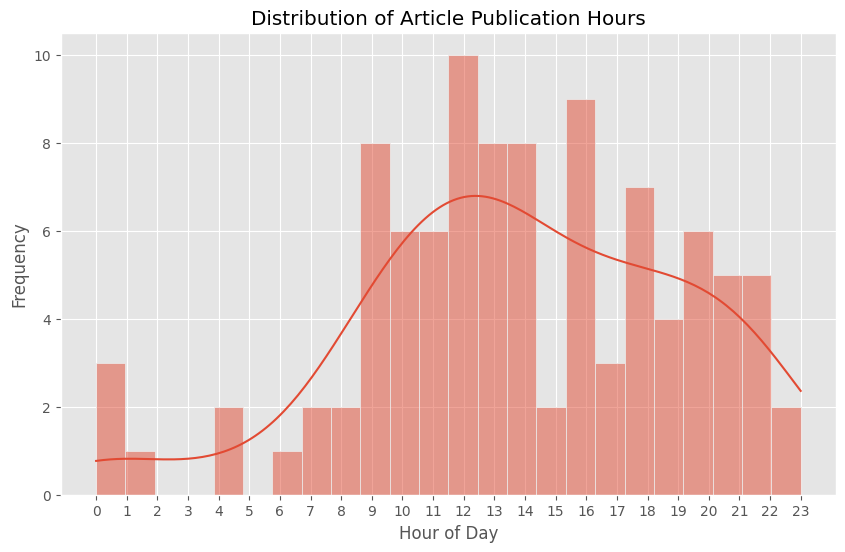

In [68]:
# Visualize the distribution of article publication hours
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hour', bins=24, kde=True)
plt.title("Distribution of Article Publication Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.show()

* Visualize the distribution of article publication hours by group

<ipython-input-69-3031722841>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Group")


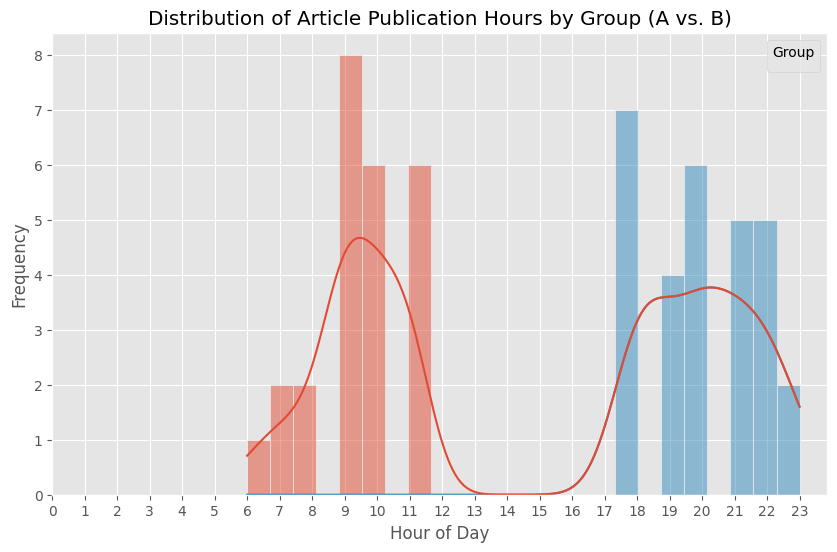

In [69]:
# Filter the DataFrame to include only Group A and Group B
ab_test_df = df[df['group'].isin(['A', 'B'])].copy()

# Visualize the distribution of article publication hours by group
plt.figure(figsize=(10, 6))
sns.histplot(data=ab_test_df, x='hour', hue='group', multiple='stack', bins=24, kde=True)
plt.title("Distribution of Article Publication Hours by Group (A vs. B)")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.legend(title="Group")
plt.show()

 * Boxplot to Visualize Hour Distribution by Group

<ipython-input-70-3386375045>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ab_test_df, x='group', y='hour', palette='Set2')


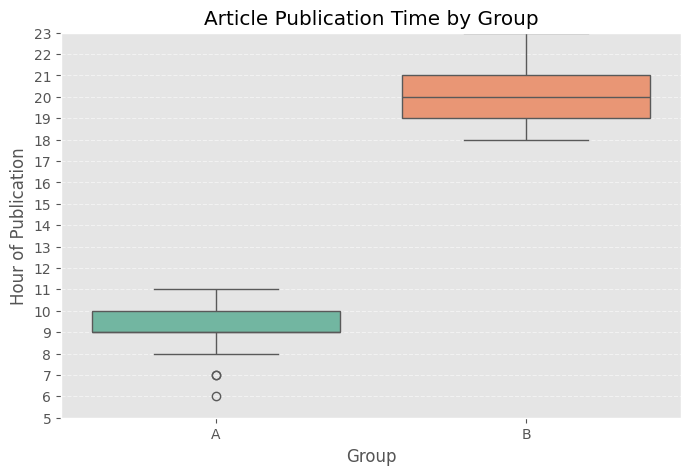

In [70]:
# boxplot is perfect to show statistical measures by group.
plt.figure(figsize=(8, 5))
sns.boxplot(data=ab_test_df, x='group', y='hour', palette='Set2')
plt.title('Article Publication Time by Group')
plt.xlabel('Group')
plt.ylabel('Hour of Publication')
plt.ylim(5, 23)
plt.yticks(range(5, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# **Characteristic Analysis and Visualization (Based on Simulated Groups)**

* Headline Length Analysis

In [71]:
# Calculate headline length
df['headline_length'] = df['title'].apply(lambda x: len(x.split()))


In [72]:
# summary statistics for headline length by group
group_stats = df.groupby('group')['headline_length'].agg(['mean', 'median', 'std', 'count'])
group_stats

,mean,median,std,count
group,,,,
A,12.160000,11.0,4.606879,25
B,12.655172,13.0,3.351715,29
Mid-day,11.695652,11.0,3.595488,46


* calculate t-statistic and the p-value headline length by group

In [73]:
from scipy.stats import ttest_ind

group_A = df[df['group'] == 'A']['headline_length']
group_B = df[df['group'] == 'B']['headline_length']

t_stat, p_val = ttest_ind(group_A, group_B, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: -0.44534065782643206, P-Value: 0.658297744019952


* Visualization of Headline Distribution Based on Simulation Group

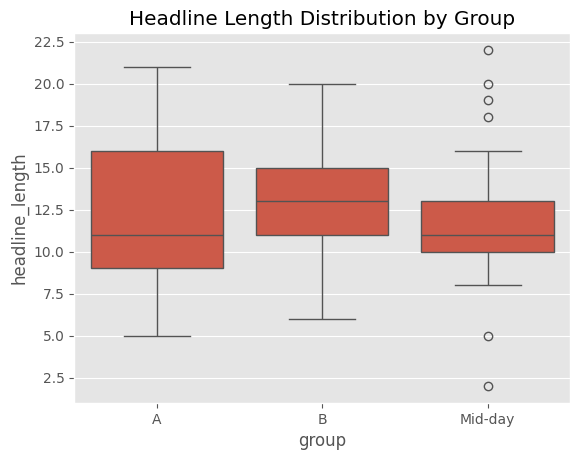

In [74]:
sns.boxplot(x='group', y='headline_length', data=df)
plt.title("Headline Length Distribution by Group")
plt.show()


In [75]:
# Identify outliers in headline length using IQR
Q1 = df['headline_length'].quantile(0.25)
Q3 = df['headline_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_headline_length = df[(df['headline_length'] < lower_bound) | (df['headline_length'] > upper_bound)]
print(f"\nNumber of outliers in headline length: {len(outliers_headline_length)}")
print("Outliers in Headline Length:")
print(outliers_headline_length[['title', 'headline_length']])


Number of outliers in headline length: 3
Outliers in Headline Length:
                                                title  headline_length
34  Buying Nvidia Stock Before May 28 Could Be You...               22
40                                   Deepseek R1-0528                2
96  Google DeepMind's CEO says Gemini's upgrades c...               21


In [76]:
# remove these outliers
df_cleaned = df[(df['headline_length'] >= lower_bound) & (df['headline_length'] <= upper_bound)].copy()
print(f"\nShape of DataFrame after removing headline length outliers: {df_cleaned.shape}")


Shape of DataFrame after removing headline length outliers: (97, 7)


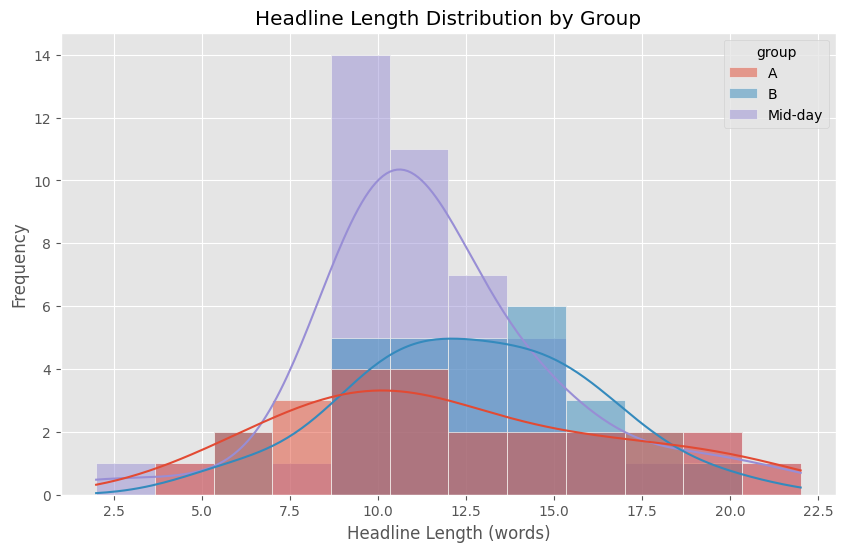

In [77]:
# Visualize headline length distribution for each group(A, B, Mid-day)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='headline_length', hue='group', kde=True)
plt.title("Headline Length Distribution by Group")
plt.xlabel("Headline Length (words)")
plt.ylabel("Frequency")
plt.show()

## **Source Analysis**

In [78]:
# Get the top sources for each group
top_sources_A = df[df['group'] == 'A']['source'].value_counts()
top_sources_B = df[df['group'] == 'B']['source'].value_counts()

print("Sources in Group A:\n", top_sources_A)
print("\nSources in Group B:\n", top_sources_B)

Sources in Group A:
 source
{'id': None, 'name': 'Yahoo Entertainment'}               7
{'id': 'business-insider', 'name': 'Business Insider'}    4
{'id': 'wired', 'name': 'Wired'}                          2
{'id': None, 'name': 'Slashdot.org'}                      2
{'id': None, 'name': 'Windows Central'}                   2
{'id': None, 'name': 'Huggingface.co'}                    1
{'id': 'the-verge', 'name': 'The Verge'}                  1
{'id': None, 'name': 'The Atlantic'}                      1
{'id': None, 'name': 'BBC News'}                          1
{'id': None, 'name': 'Github.com'}                        1
{'id': None, 'name': 'MarketWatch'}                       1
{'id': None, 'name': 'Openculture.com'}                   1
{'id': None, 'name': 'Hubspot.com'}                       1
Name: count, dtype: int64

Sources in Group B:
 source
{'id': 'business-insider', 'name': 'Business Insider'}    5
{'id': None, 'name': 'Slashdot.org'}                      5
{'id': 'the-verge

In [79]:
# use the 'source_name' column for grouping and counting
source_counts = df.groupby('group')['source'].value_counts().unstack().fillna(0)

In [80]:
# Select top 5 sources for visualization.
top_n = 5
top_five = source_counts.sum(axis=0).sort_values(ascending=False).head(top_n)
top_five


,0
source,
"{'id': None, 'name': 'Yahoo Entertainment'}",16.0
"{'id': 'business-insider', 'name': 'Business Insider'}",14.0
"{'id': None, 'name': 'Slashdot.org'}",12.0
"{'id': None, 'name': 'Gizmodo.com'}",8.0
"{'id': 'wired', 'name': 'Wired'}",6.0


Visualization of Source Analysis Based on Simulated Groups

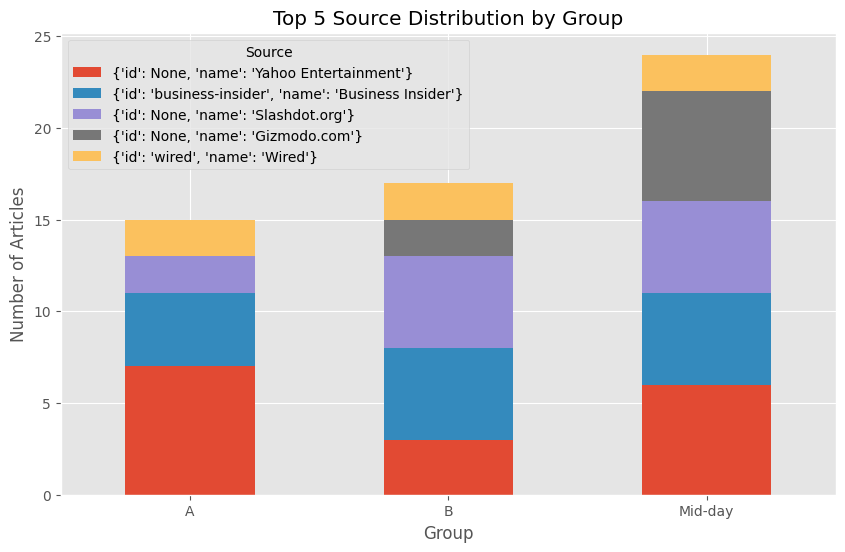

In [81]:
# visualization of the Select top 5 sources
source_count_subset = source_counts.loc[:, top_five.index]
source_count_subset.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Top 5 Source Distribution by Group")
plt.xlabel("Group")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.show()

# **Simulating Engagement & A/B Test**

* Simulation Parameters

In [82]:
# Simulation Parameters
baseline_engagement = 10
headline_length_optimal = 15    # Assume 15 words is optimal
headline_length_pf = 0.5        # Penalty for deviation from optimal length
source_bonus = {'The New York Times': 5, 'CNN': 3}    # Bonus for specific sources
source_penalty = {'Unknown': -3}      # Penalty for unknown sources
time_group_bonus = {'A': 2, 'B': 1} # Bonus for Group A (morning) and Group B (Mid-day)

* Simulate Engagement

In [83]:
# Simulate Engagement
def simulate_engagement(row):
    engagement = baseline_engagement

    # Headline Length effect
    headline_diff = abs(row['headline_length'] - headline_length_optimal)
    engagement -= headline_diff * headline_length_pf

    # Source effect
    source_name = row['source'] if 'source' in row and pd.notna(row['source']) else 'Unknown'
    if source_name in source_bonus:
            engagement += source_bonus[source_name]
    elif source_name in source_penalty:
            engagement += source_penalty[source_name]

    # Add some random noise to make it more realistic (Adding random variation)
    engagement += np.random.normal(0, 2)

    # Ensure engagement is not negative
    return max(0, engagement)

* Applying the Simulation

In [84]:
# Apply the simulation function to create the 'simulated_engagement' column
df['simulated_engagement'] = df.apply(simulate_engagement, axis=1)

# Display the first few rows with the new column
print(df[['title', 'group', 'headline_length', 'source', 'simulated_engagement']].head())

                                               title group  headline_length  \
0  Facing a Changing Industry, AI Activists Rethi...     A                9   
1            Everything Google Announced at I/O 2025     B                6   
2  All-in-One AI Platform 1minAI Is Now Almost Fr...     B               16   
3  Reddit sues Anthropic, alleging its bots acces...     B               15   
4  AI could consume more power than Bitcoin by th...     B               12   

                                     source  simulated_engagement  
0          {'id': 'wired', 'name': 'Wired'}              8.535240  
1          {'id': 'wired', 'name': 'Wired'}              7.857362  
2       {'id': None, 'name': 'Gizmodo.com'}              9.203248  
3  {'id': 'the-verge', 'name': 'The Verge'}             13.178855  
4  {'id': 'the-verge', 'name': 'The Verge'}              9.428510  


In [85]:
# filter for A/B test groups
ab_test_df = df[df['group'].isin(['A', 'B'])].copy()

In [96]:
# Display simulated engagement for A/B test groups
print("\nSimulated Engagement for A/B Test Groups:")
print(ab_test_df[['title', 'group', 'simulated_engagement']].head(10))


Simulated Engagement for A/B Test Groups:
                                                title group  \
0   Facing a Changing Industry, AI Activists Rethi...     A   
1             Everything Google Announced at I/O 2025     B   
2   All-in-One AI Platform 1minAI Is Now Almost Fr...     B   
3   Reddit sues Anthropic, alleging its bots acces...     B   
4   AI could consume more power than Bitcoin by th...     B   
5   2 Millionaire-Maker Artificial Intelligence (A...     A   
6   How Peter Thiel’s Relationship With Eliezer Yu...     A   
7   I called Klarna's new AI doppelganger of its C...     B   
8          Artificial Intelligence Is Not Intelligent     A   
11  PCIe 7.0 is coming, but not soon, and not for you     A   

    simulated_engagement  
0               8.535240  
1               7.857362  
2               9.203248  
3              13.178855  
4               9.428510  
5               8.242755  
6              10.135505  
7               7.267157  
8               2.95

* Analyze Simulated Engagement by Group

In [97]:
# Analyze simulated engagement by group
engagement_by_group = df.groupby('group')['simulated_engagement'].agg(['mean', 'median', 'std', 'count'])
print("\nSimulated Engagement by Group:")
engagement_by_group


Simulated Engagement by Group:


,mean,median,std,count
group,,,,
A,7.786267,7.990728,2.087976,25
B,8.718886,8.335301,2.289276,29
Mid-day,8.169102,8.375460,2.190544,46


* A/B Test (t-test)

In [88]:
# Separate the simulated engagement data for Group A and Group B
group_A_engagement = ab_test_df[ab_test_df['group'] == 'A']['simulated_engagement']
group_B_engagement = ab_test_df[ab_test_df['group'] == 'B']['simulated_engagement']


In [89]:
# Conduct the independent samples t-test
# equal_var=False is used when assuming the variances of the two groups are not equal (Welch's t-test)
t_stat, p_val = ttest_ind(group_A_engagement, group_B_engagement, equal_var=False)

# Print the results of the t-test
print(f"T-Statistic (Simulated Engagement): {t_stat}")
print(f"P-Value (Simulated Engagement): {p_val}")

T-Statistic (Simulated Engagement): -1.565048460371528
P-Value (Simulated Engagement): 0.1236587325590202


* Visualize the simulated Engagement Distribution by Group(A vs B) using box plot

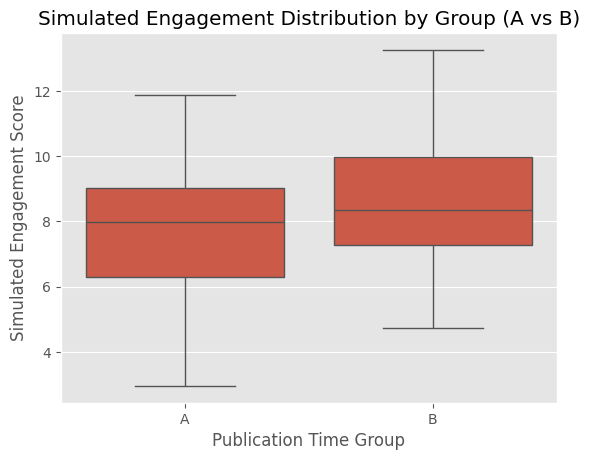

In [98]:
# Visualize the simulated Engagement Distribution by Group(A vs B) using box plot
sns.boxplot(x='group', y='simulated_engagement', data=ab_test_df)
plt.title("Simulated Engagement Distribution by Group (A vs B)")
plt.xlabel("Publication Time Group")
plt.ylabel("Simulated Engagement Score")
plt.show()

* Visualize the Distribution of Simulated Engagement Distribution for each group

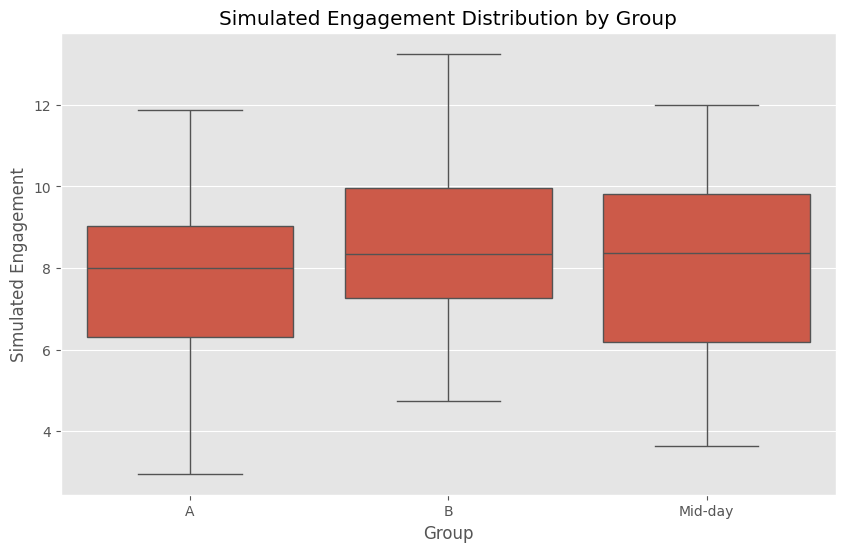

In [91]:
# Visualize the Distribution of Simulated Engagement Distribution for each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='simulated_engagement', data=df)
plt.title("Simulated Engagement Distribution by Group")
plt.xlabel("Group")
plt.ylabel("Simulated Engagement")
plt.show()


* Visualize the Mean simulated Engagement by Group (A vs B)

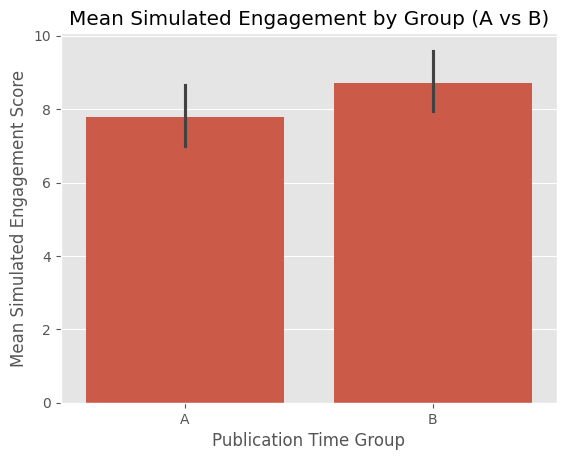

In [92]:
# Visualize the Mean simulated Engagement by Group (A vs B) using a bar plot
sns.barplot(x='group', y='simulated_engagement', data=ab_test_df, errorbar='ci') # 'ci' shows confidence intervals
plt.title("Mean Simulated Engagement by Group (A vs B)")
plt.xlabel("Publication Time Group")
plt.ylabel("Mean Simulated Engagement Score")
plt.show()


* Visualize the Mean simulated Engagement by Group (A vs B vs Mid-day)

<Axes: xlabel='group', ylabel='simulated_engagement'>

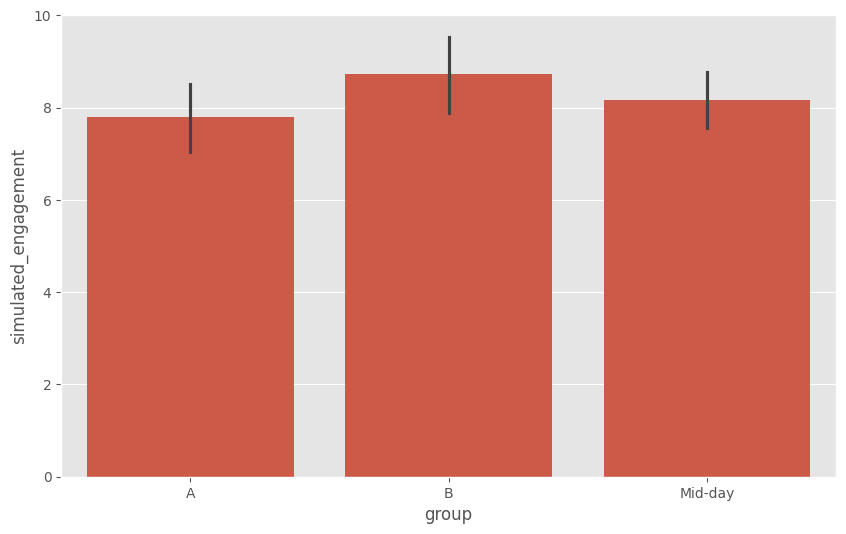

In [93]:
# Visualize the Mean simulated Engagement by Group (A vs B vs Mid-day)
plt.figure(figsize=(10, 6))
sns.barplot(x='group', y='simulated_engagement', data=df, errorbar='ci')

* Simulated engagement by source and group

In [95]:
# Simulated engagement by source and group
engagement_by_source_group = ab_test_df.groupby(['source', 'group'])['simulated_engagement'].mean().unstack().fillna(0)
print("\nSimulated Engagement by Source and Group:\n", engagement_by_source_group)


Simulated Engagement by Source and Group:
 group                                                       A          B
source                                                                  
{'id': 'abc-news', 'name': 'ABC News'}               0.000000   9.184523
{'id': 'business-insider', 'name': 'Business In...   7.475203   8.925122
{'id': 'the-verge', 'name': 'The Verge'}             5.713460  11.725549
{'id': 'wired', 'name': 'Wired'}                     9.335373   7.434590
{'id': None, 'name': 'BBC News'}                     5.411743   7.482993
{'id': None, 'name': 'CNET'}                         0.000000   6.700927
{'id': None, 'name': 'Github.com'}                   5.503556   0.000000
{'id': None, 'name': 'Gizmodo.com'}                  0.000000   9.672496
{'id': None, 'name': 'Hubspot.com'}                  9.160185   0.000000
{'id': None, 'name': 'Huggingface.co'}               6.390862   0.000000
{'id': None, 'name': 'MacRumors'}                    0.000000   9.484092
{'id': 

* Visualize Simulated engagement by source and group

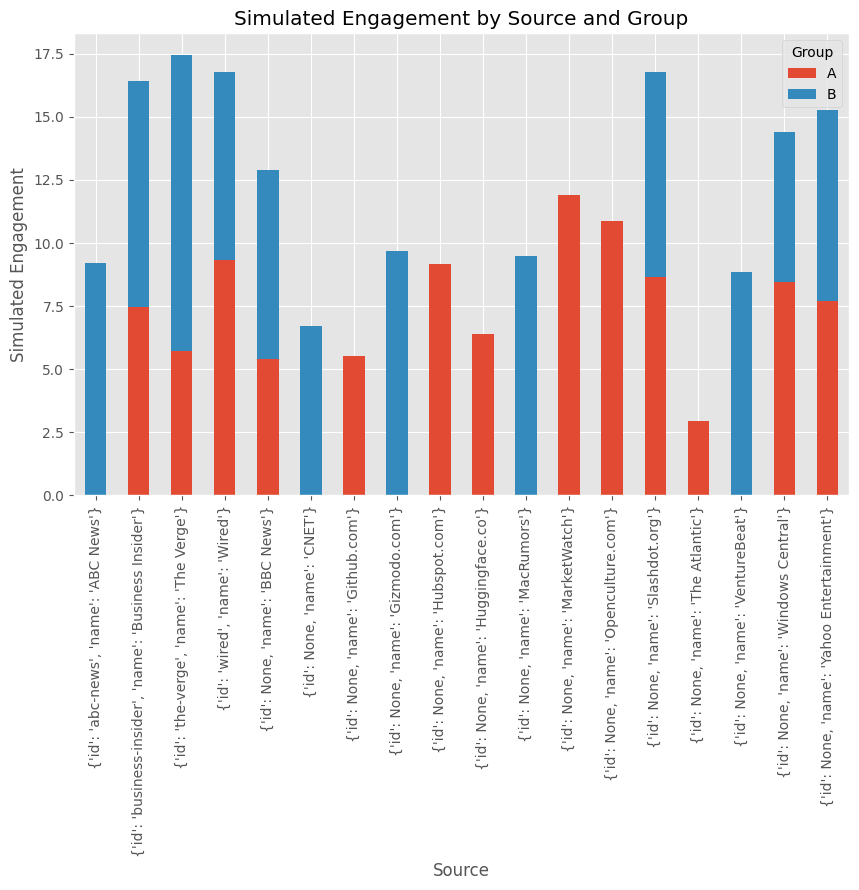

In [100]:
# Simulated engagement by source and group
engagement_by_source_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Simulated Engagement by Source and Group")
plt.xlabel("Source")
plt.ylabel("Simulated Engagement")
plt.legend(title="Group")
plt.show()

* Simulated Engagement by Source (Group A)

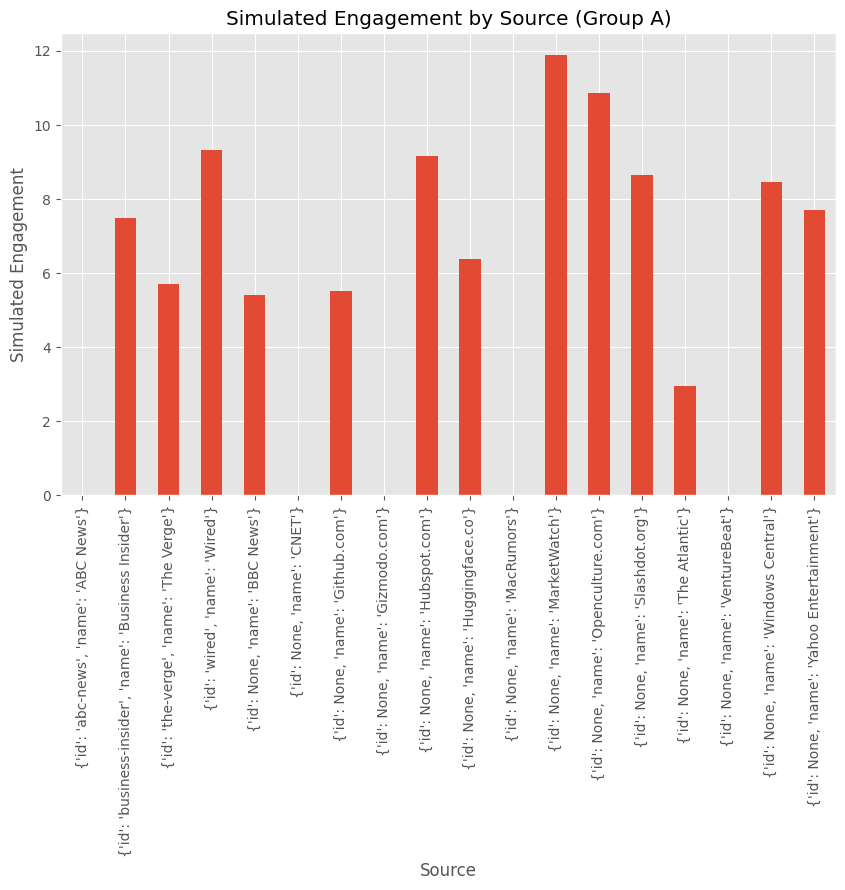

In [105]:
# Simulated Engagement by Source (Group A) plot
engagement_by_source_group['A'].plot(kind='bar', figsize=(10, 6))
plt.title("Simulated Engagement by Source (Group A)")
plt.xlabel("Source")
plt.ylabel("Simulated Engagement")
plt.show()

* Simulated Engagement by Source (Group B) plot

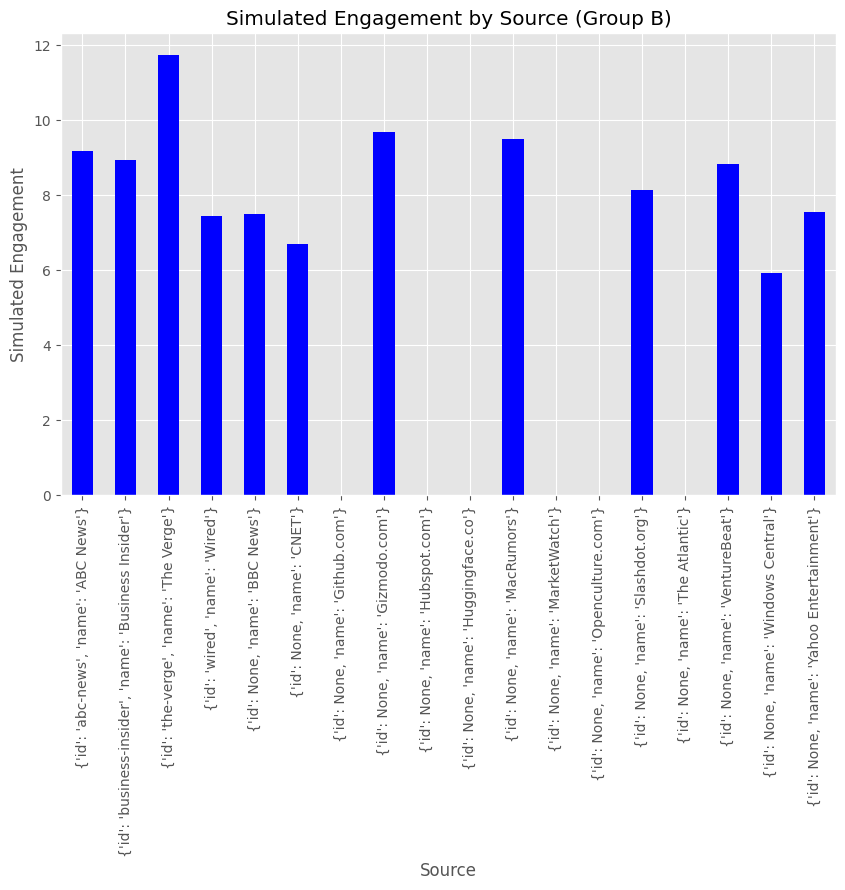

In [108]:
# Simulated Engagement by Source (Group B) plot
engagement_by_source_group['B'].plot(kind='bar', color='blue', figsize=(10, 6))
plt.title("Simulated Engagement by Source (Group B)")
plt.xlabel("Source")
plt.ylabel("Simulated Engagement")
plt.show()

* Simulated engagement by Headline_length and group

In [99]:
# Simulated engagement by Headline_length and group
engagement_by_headlength_group = ab_test_df.groupby(['headline_length', 'group'])['simulated_engagement'].mean().unstack().fillna(0)
print("\nSimulated Engagement by Headlength and Group:\n", engagement_by_headlength_group)



Simulated Engagement by Headlength and Group:
 group                    A          B
headline_length                      
5                 2.953787   0.000000
6                 6.827249   6.300729
8                 6.282004   0.000000
9                 6.618159   7.648137
10                8.388648   8.182526
11                7.916425   8.301574
12                7.785749   9.515742
13               10.489867   8.873657
14               10.005357   9.269352
15                0.000000  10.719838
16                8.593186  10.849544
17                9.026151   8.067480
18                6.144684   5.925621
20                9.485786   7.267157
21                7.907954   0.000000


* Visualize Simulated engagement by Headline_length and group

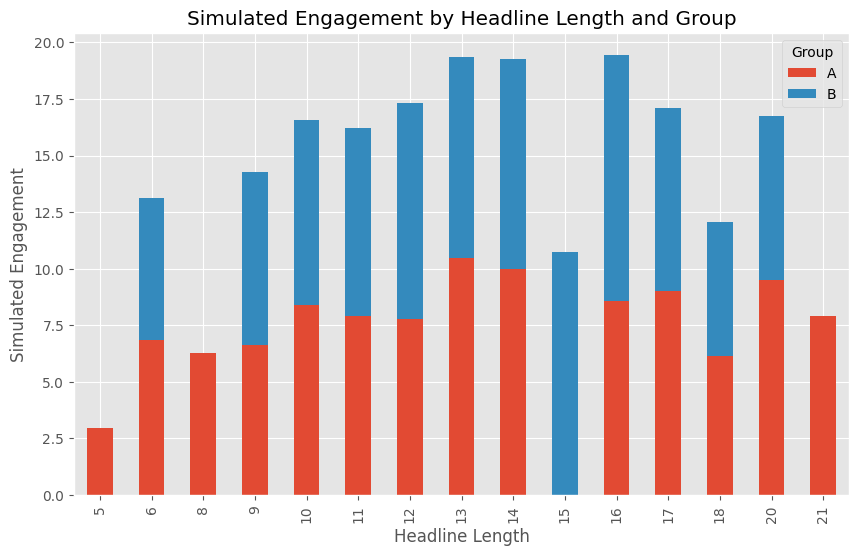

In [110]:
# Visualize Simulated engagement by Headline_length and group
engagement_by_headlength_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Simulated Engagement by Headline Length and Group")
plt.xlabel("Headline Length")
plt.ylabel("Simulated Engagement")
plt.legend(title="Group")
plt.show()

* Simulated engagement by Headline_length and Group A

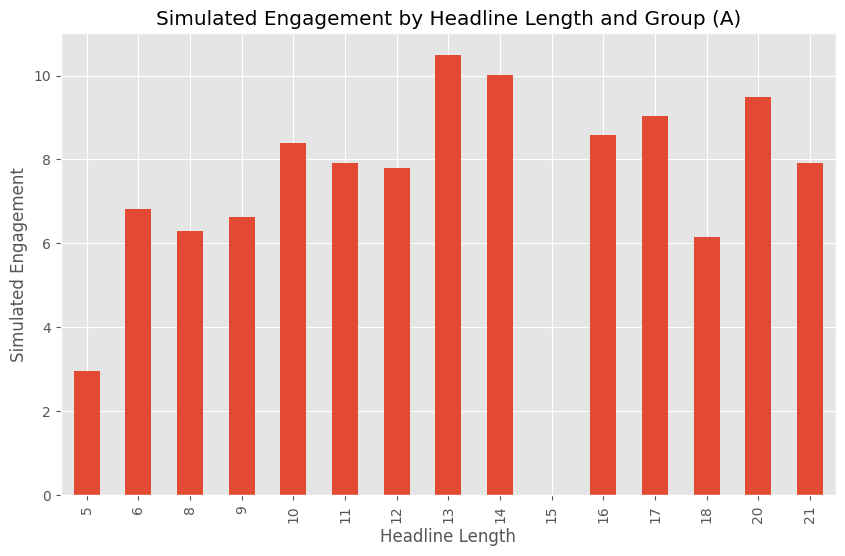

In [113]:
# Visualize Simulated engagement by Headline_length and group A
engagement_by_headlength_group['A'].plot(kind='bar', figsize=(10, 6))
plt.title("Simulated Engagement by Headline Length and Group (A)")
plt.xlabel("Headline Length")
plt.ylabel("Simulated Engagement")
plt.show()

* Simulated engagement by Headline_length and Group B

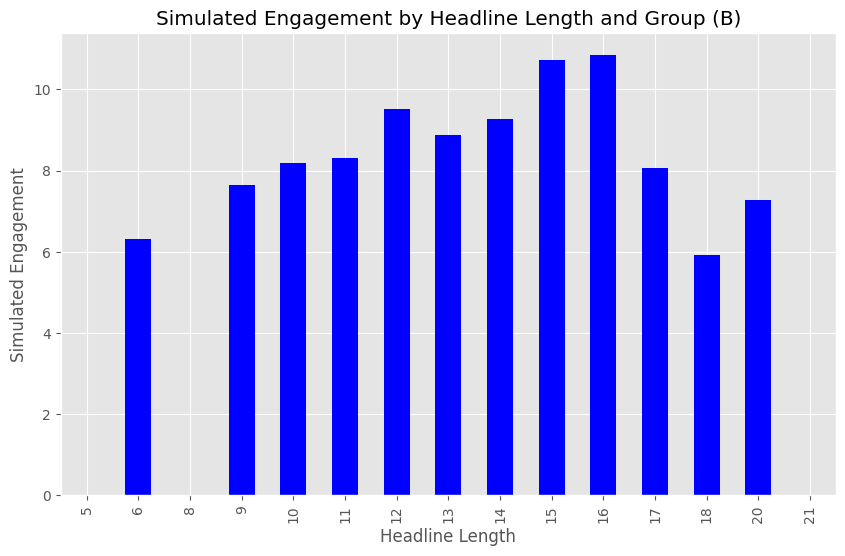

In [115]:
# Visualize Simulated engagement by Headline_length and group B
engagement_by_headlength_group['B'].plot(kind='bar', color='blue', figsize=(10, 6))
plt.title("Simulated Engagement by Headline Length and Group (B)")
plt.xlabel("Headline Length")
plt.ylabel("Simulated Engagement")
plt.show()

# **Further Analysis and Insights**

* Word Cloud of Top 5 Headlines by Simulated Engagement

In [135]:
# Sort the DataFrame by 'simulated_engagement' in descending order and select the top 5 rows
top_5_articles = df.sort_values(by='simulated_engagement', ascending=False).head(5)

In [136]:
# Combine the titles of these top 5 articles into a single string and Use .dropna() to drop any of the top titles unexpectedly missing
top_5_headlines_text = ' '.join(top_5_articles['title'].dropna())

In [137]:
# Generate the word cloud for these headlines
wordcloud_top_5 = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(top_5_headlines_text)


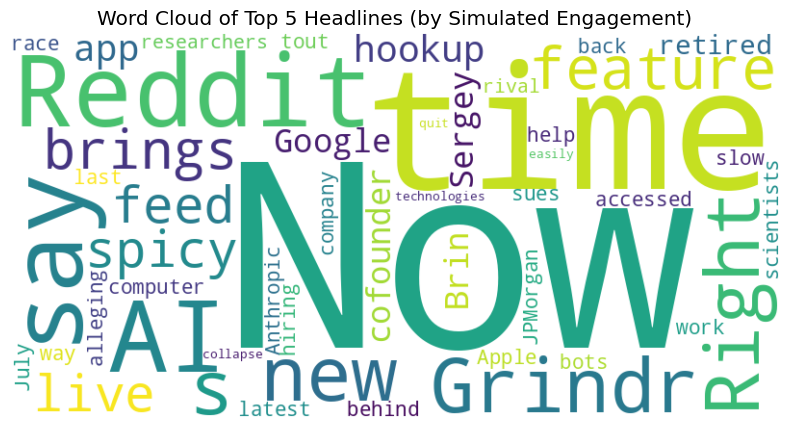

In [138]:
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top_5, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Word Cloud of Top 5 Headlines (by Simulated Engagement)')
plt.show()

* Word clouds by groups (A vs B)

In [139]:
# # Combine the titles of A & B groups into a single string
headlines_group_a = ' '.join(ab_test_df[ab_test_df['group'] == 'A']['title'].dropna())
headlines_group_b = ' '.join(ab_test_df[ab_test_df['group'] == 'B']['title'].dropna())

In [140]:
# Generate the word cloud for A vs B groups
wordcloud_a = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(headlines_group_a)
wordcloud_b = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(headlines_group_b)

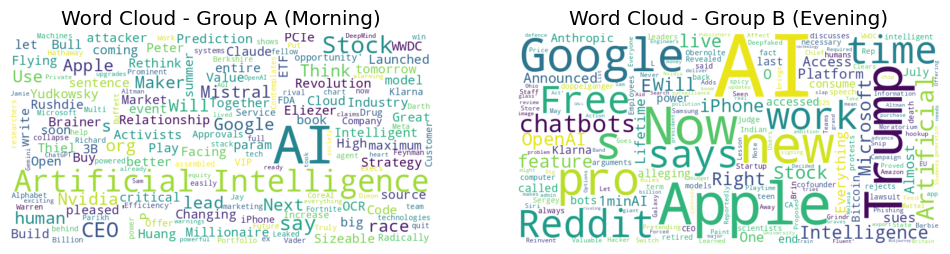

In [141]:
# Display the generated word cloud for A vs B groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Group A (Morning)')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Group B (Evening)')

plt.show()

* Word Clouds based on Simulated Engagement Level

In [142]:
# Define Engagement Threshold
engagement_threshold = df['simulated_engagement'].median()

In [143]:
# Separate Headlines by Simulated Engagement Level
high_engagement_headlines = ' '.join(df[df['simulated_engagement'] >= engagement_threshold]['title'].dropna())
low_engagement_headlines = ' '.join(df[df['simulated_engagement'] < engagement_threshold]['title'].dropna())

In [144]:
# Convert headlines to lowercase and split into words
words_high = high_engagement_headlines.lower().split()
words_low = low_engagement_headlines.lower().split()

In [145]:
# Convert lists of words to sets for easy intersection
set_words_high = set(words_high)
set_words_low = set(words_low)

In [146]:
# Find the intersection of the two sets
common_words = set_words_high.intersection(set_words_low)

In [147]:
# Create an Updated Stopwords List and Combine the default STOPWORDS with the common words found
custom_stopwords = STOPWORDS.union(common_words)

In [148]:
# Pass the custom_stopwords set to the WordCloud constructor
wordcloud_high_engagement = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(high_engagement_headlines)
wordcloud_low_engagement = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(low_engagement_headlines)

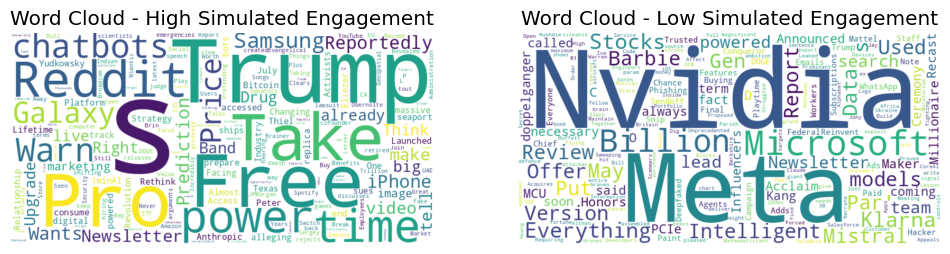

In [149]:
# Visualize Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_high_engagement, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - High Simulated Engagement')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_low_engagement, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Low Simulated Engagement')

plt.show()

# **Conclusion**

Visit the Documentation Report for final conclusion.

# **Author**

Yetunde Badru